 REDES NEURONALES

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

In [16]:
# data_dir = "../data/raw"

# dog_subfolder = os.path.join(data_dir, "dog")

# dog_image_files = os.listdir(dog_subfolder)

# num_images = min(9, len(dog_image_files))

In [4]:
# Ruta al directorio que contiene sus datos de imagen
data_dir = "../data/raw"

# Obtener una lista de todos los nombres de archivos de imágenes de perros
dog_subfolder = os.path.join(data_dir, "dog")

# Obtener una lista de todos los nombres de archivos de imágenes de perros
dog_image_files = os.listdir(dog_subfolder)

dog_images = []

for i in range(num_images):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path, target_size=(200, 200)) 
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalizar la imagen
    dog_images.append(img_array)

dog_images = np.array(dog_images)
print(f"Se han cargado y procesado {num_images} imágenes.")

dog_image_files = os.listdir(dog_subfolder)
print("Archivos en la subcarpeta 'dog':")
for file in dog_image_files:
            print(file)


Se han cargado y procesado 9 imágenes.
Archivos en la subcarpeta 'dog':
dog.4936.jpg
dog.10360.jpg
dog.5459.jpg
dog.12003.jpg
dog.7870.jpg
dog.11794.jpg
dog.3934.jpg
dog.915.jpg
dog.12216.jpg
dog.11995.jpg
dog.9748.jpg
dog.1552.jpg
dog.11651.jpg
dog.11869.jpg
dog.11491.jpg
dog.10204.jpg
dog.410.jpg
dog.3203.jpg
dog.213.jpg
dog.871.jpg
dog.9876.jpg
dog.10419.jpg
dog.11414.jpg
dog.6125.jpg
dog.2561.jpg
dog.1500.jpg
dog.11606.jpg
dog.7214.jpg
dog.6609.jpg
dog.9832.jpg
dog.7181.jpg
dog.2335.jpg
dog.10184.jpg
dog.10672.jpg
dog.2812.jpg
dog.9037.jpg
dog.2322.jpg
dog.12273.jpg
dog.385.jpg
dog.11981.jpg
dog.7335.jpg
dog.11487.jpg
dog.462.jpg
dog.10230.jpg
dog.3843.jpg
dog.1651.jpg
dog.4158.jpg
dog.12062.jpg
dog.7221.jpg
dog.4188.jpg
dog.4040.jpg
dog.12102.jpg
dog.14.jpg
dog.11161.jpg
dog.4637.jpg
dog.4362.jpg
dog.1789.jpg
dog.5208.jpg
dog.10003.jpg
dog.5304.jpg
dog.6894.jpg
dog.8369.jpg
dog.354.jpg
dog.11653.jpg
dog.11958.jpg
dog.4486.jpg
dog.2948.jpg
dog.10990.jpg
dog.8882.jpg
dog.5884.jpg
do

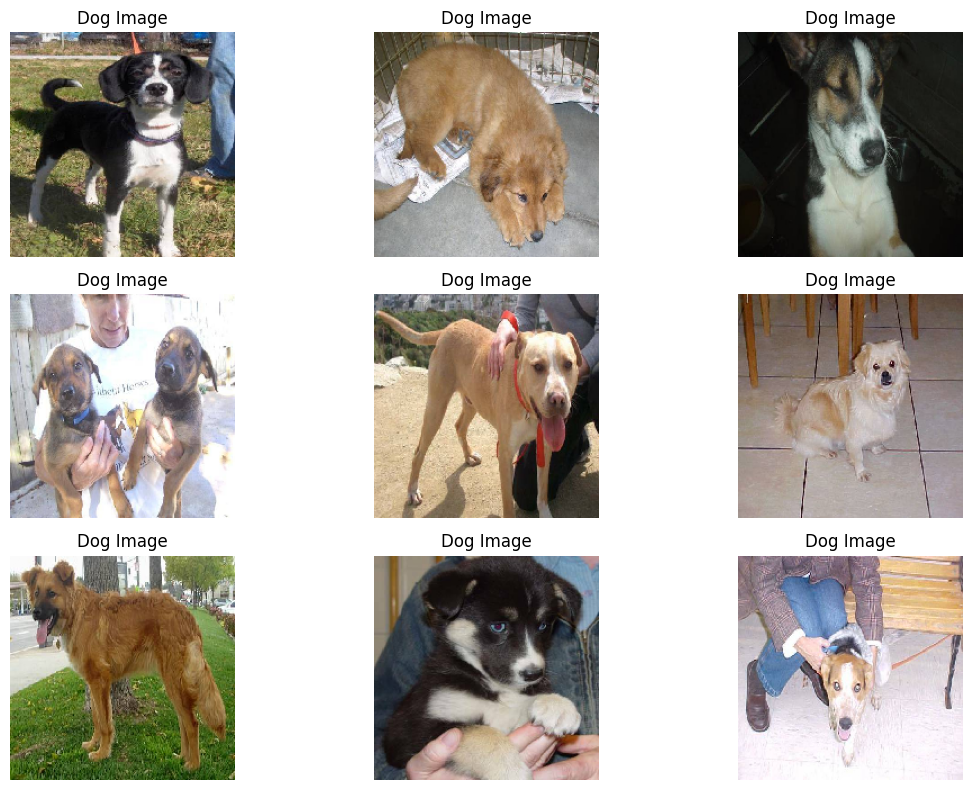

In [5]:

plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Ajustar el diseño
plt.tight_layout()

# Mostrar las imágenes
plt.show()

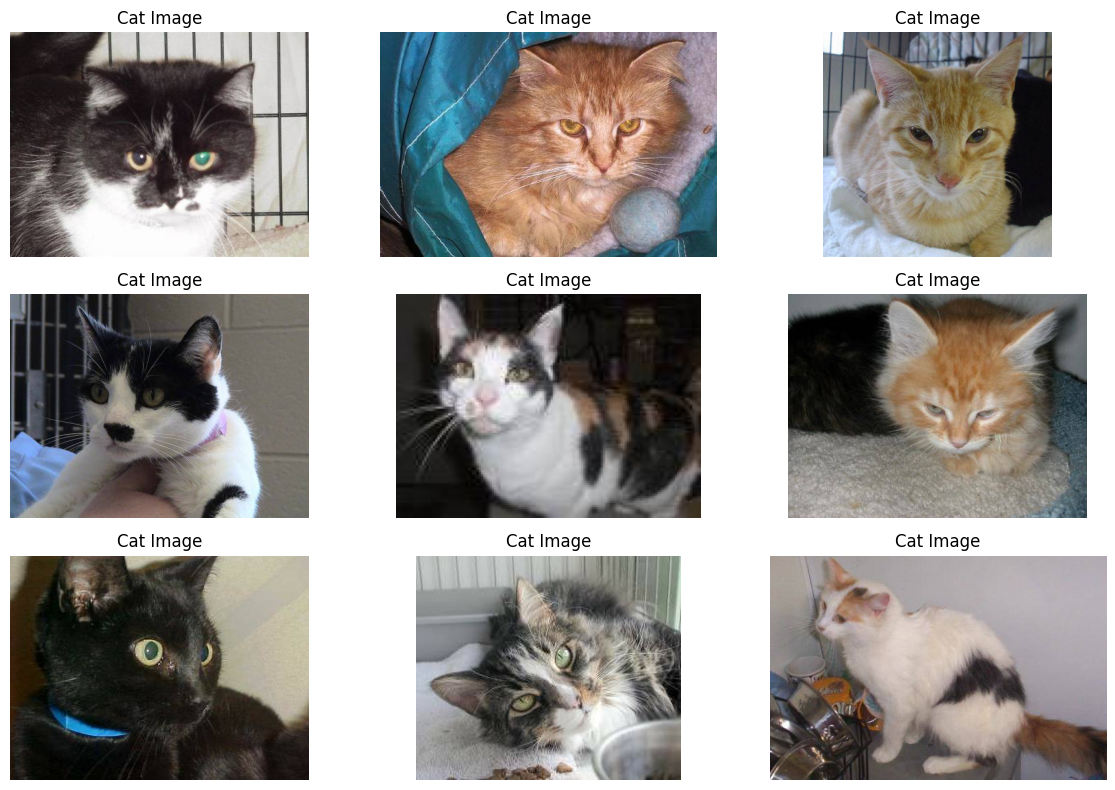

In [6]:

data_dir = "../data/raw"

cats_subfolder = os.path.join(data_dir, "cat")

cats_image_files = os.listdir(cats_subfolder)

cats_images = []
for i in range(min(9, len(cats_image_files))):  # Limitar a las imágenes de gato disponibles
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)

plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [7]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [8]:
# tensorflow no carga bien

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img, save_img

train_dir = "../data/raw"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Generación de datos de entrenamiento
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dog", "cat"] 
)

# Generación de datos de prueba
test_data = datagentest.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["test"] 
)

Found 25000 images belonging to 2 classes.
Found 0 images belonging to 1 classes.


In [12]:
# Mover los datos a través de la red neuronal
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Mover los datos por las capas densas
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

In [13]:
# Compilar el modelo con Adam 
from tensorflow.keras.optimizers import Adam

# Compilar el modelo antes del entrenamiento
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [14]:
# Entrenar el modelo
model.fit(train_data, epochs = 1)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 25088, but received input with shape (None, 18432)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 200, 200, 3), dtype=float32)
  • training=True
  • mask=None